In [87]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
import os


import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature


plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
titulo = 'Oceano Global'
titulo_short = 'NH'

In [338]:
# Daily data
data = xr.open_dataset('./data/sstm_mean_'+titulo_short+'.nc')
sst = data.sst
data = xr.open_dataset('./data/sstm_anom_mean_'+titulo_short+'.nc')
sst_anom = data.sst

In [339]:
y = sst_anom.to_numpy()
x = np.arange(0,y.size)
r = np.polyfit(x,y,1)
yi = np.polyval(r, x)

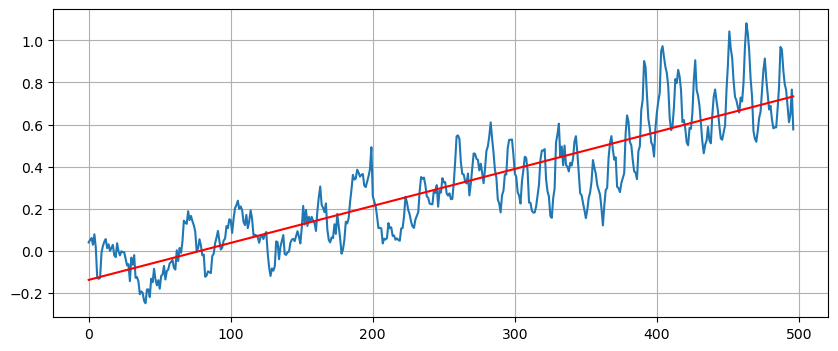

In [340]:
fig, ax= plt.subplots()
ax.plot(x,y)
ax.grid()
ax.plot(x,yi,'r')

In [345]:
trend = np.arange(0,y.size-36)*0.0
i1=0
for inicial in np.arange(0,y.size-36)*0.0:
    r = np.polyfit(x[i1:-1],y[i1:-1],1)
    trend[i1]=r[0]*12*100
    i1=i1+1

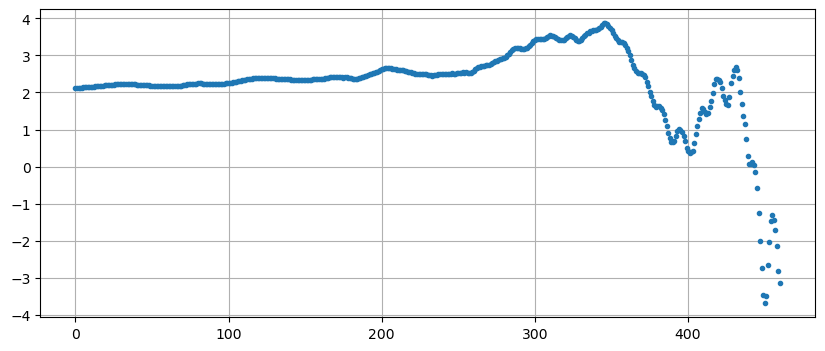

In [346]:
plt.plot(trend,'.')
plt.grid()

In [354]:
ind_notrend=min(np.nonzero(trend<=0))[0]

In [355]:
r = np.polyfit(x[ind_notrend:-1],y[ind_notrend:-1],1)
yi_notrend = np.polyval(r, x[ind_notrend:-1])

<xarray.DataArray 'time' ()>
array('2019-01-31T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2019-01-31

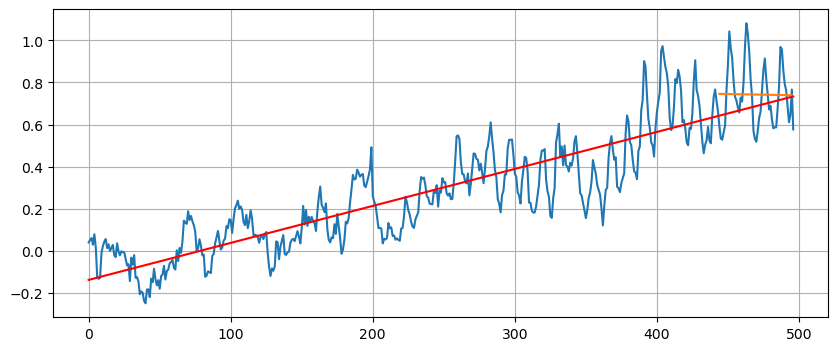

In [357]:
fig, ax= plt.subplots()
ax.plot(x,y)
ax.plot(x[ind_notrend:-1],yi_notrend)
ax.grid()
ax.plot(x,yi,'r')
(y.size-ind_notrend)/12
sst.time[ind_notrend]

## Calculando tendendias globales

In [331]:
ds = xr.open_dataset('./data/sstm_anom_GO.nc')
sst_short=ds.sst[ds.sst.time.size-6*12:-1,:,:]
ds.sst.time[ds.sst.time.size-6*12]
#sst_short=ds.sst


<xarray.DataArray 'time' ()>
array('2017-06-30T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-06-30
    month    int64 ...

In [333]:
#Paso a C centuria
trend=sst_short.polyfit(dim = "time", deg = 1)*1e9 * 60  * 60  * 24 * 30 * 12 *100

*1e9 * 60  * 60  * 24 * 30 * 12  pasa a ºC/año

(array([5.00000e+00, 1.30000e+01, 1.90600e+03, 2.14720e+04, 2.12275e+05,
        3.47856e+05, 4.69940e+04, 6.04400e+03, 2.31000e+02, 3.90000e+01]),
 array([-84.05733081, -67.50114728, -50.94496375, -34.38878021,
        -17.83259668,  -1.27641315,  15.27977039,  31.83595392,
         48.39213745,  64.94832098,  81.50450452]),
 <BarContainer object of 10 artists>)

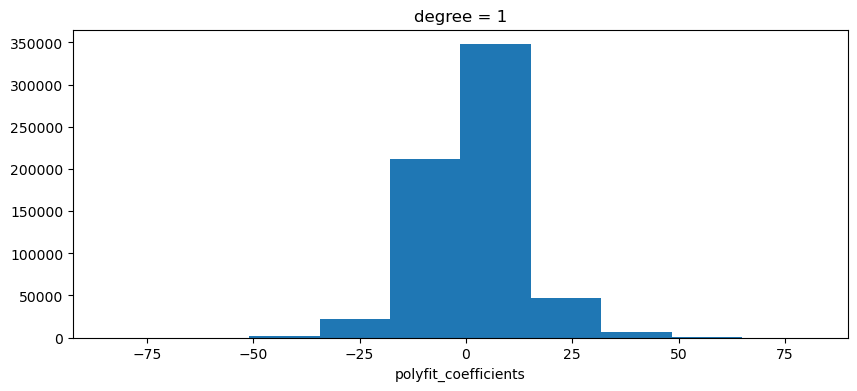

In [335]:
trend.polyfit_coefficients[0,:,:].plot.hist()

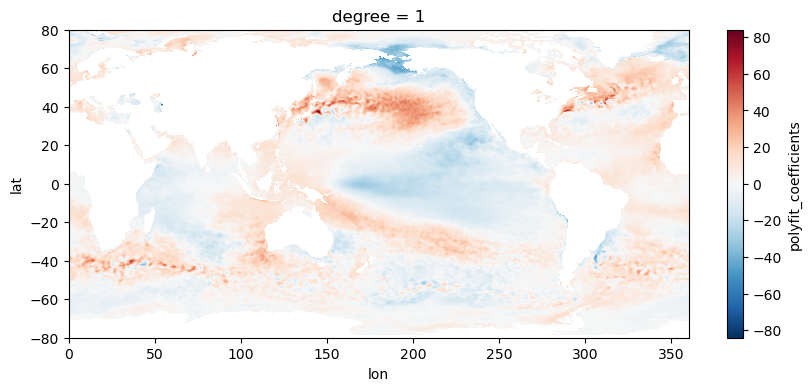

In [336]:
trend.polyfit_coefficients[0,:,:].plot()

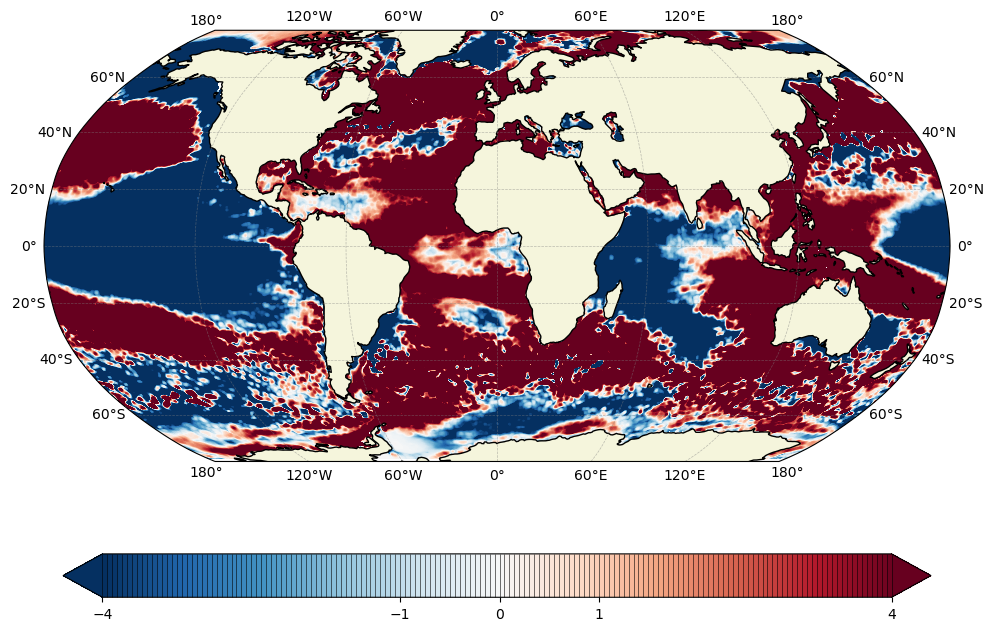

In [337]:
fig = plt.figure(figsize=(14,8))

ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
cm=ax.contourf(trend.lon,trend.lat,trend.polyfit_coefficients[0,:,:],
               levels=np.arange(-4,4,0.05), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -4,vmax = 4,extend='both')


cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-4,-1,0,1,4], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')




## En Canarias

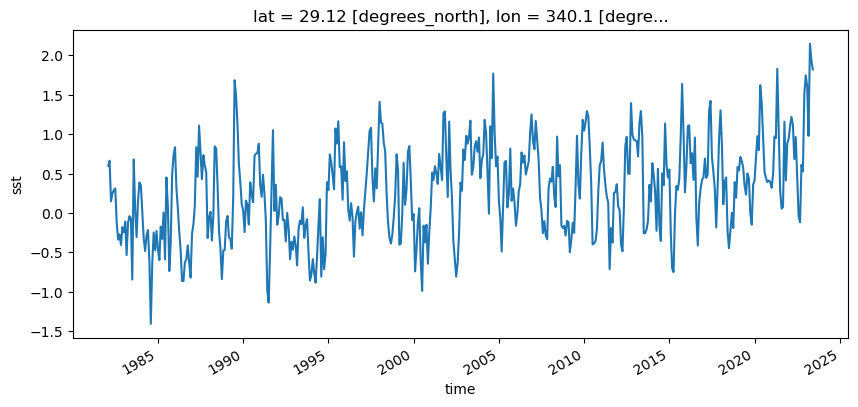

In [316]:
sst_short.sel(lat=29,lon=340,method='nearest').plot()

In [317]:
trend.sel(lat=29,lon=340,method='nearest').polyfit_coefficients

<xarray.DataArray 'polyfit_coefficients' (degree: 2)>
array([ 1.92179926e+00, -1.10716054e+18])
Coordinates:
    lat      float64 29.12
    lon      float64 340.1
  * degree   (degree) int64 1 0

https://stackoverflow.com/questions/70713838/can-someone-explain-the-logic-behind-xarray-polyfit-coefficients

In [319]:
y = sst_short.sel(lat=29,lon=340,method='nearest').to_numpy()
x = np.arange(0,sst_short.sel(lat=29,lon=340,method='nearest').size)
r = np.polyfit(x,y,1)
yi = np.polyval(r, x)

In [327]:
r

array([  0.77993792, -57.81705811])

In [321]:
trend.sel(lat=29,lon=340,method='nearest').polyfit_coefficients

<xarray.DataArray 'polyfit_coefficients' (degree: 2)>
array([ 1.92179926e+00, -1.10716054e+18])
Coordinates:
    lat      float64 29.12
    lon      float64 340.1
  * degree   (degree) int64 1 0

In [322]:
sst_short.sel(lat=29,lon=340,method='nearest').polyfit(dim = "time", deg = 1).polyfit_coefficients

<xarray.DataArray 'polyfit_coefficients' (degree: 2)>
array([ 6.17862415e-19, -3.55954393e-01])
Coordinates:
  * degree   (degree) int64 1 0

In [323]:
#para pasar a [units / month] [units/ns] * 1e9 [ns/s] * 60 [s/m] * 60 [m/h] * 24 [h/d] * 30[d/month]
6.17862415e-19 * 1e9  * 60  * 60  * 24 *30

0.0016014993796799998

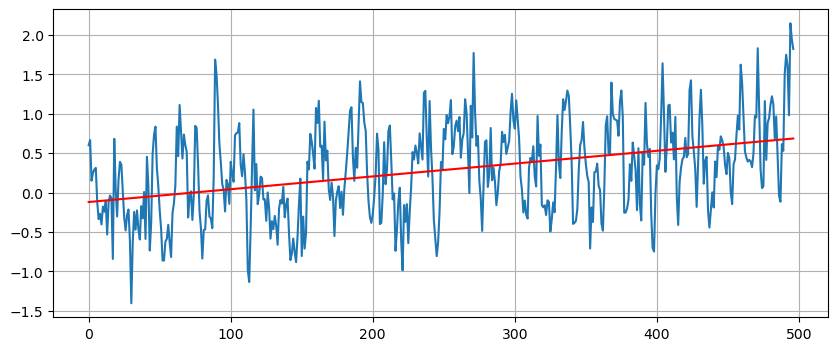

In [326]:
fig, ax= plt.subplots()
ax.plot(x,y)
ax.grid()
ax.plot(x,yi,'r')

In [330]:
yi[-1]-yi[0]

0.8059358480514108